In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/stroke-data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 11)

In [ ]:
# Fill missing values in 'bmi' column with median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [ ]:
X = df.drop(columns='stroke', axis=1)
Y = df['stroke']

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5110, 10) (4088, 10) (1022, 10)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import catboost as cb
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score, recall_score


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier(),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(),
    "Support Vector Machines (SVM)": SVC(),
    "k-Nearest Neighbors (k-NN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}

results = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict and evaluate on training data
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Predict and evaluate on testing data
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    #precision = precision_score(Y_test, Y_test_pred)
    #recall = recall_score(Y_test, Y_test_pred)

    # Store results
    results[name] = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        #'Precision': precision,
        #'Recall': recall
    }

    # Print the results
    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Testing Accuracy: {test_accuracy:.4f}")
    #print(f"  Precision: {precision:.4f}")
    #print(f"  Recall: {recall:.4f}\n")

# Find the best model based on testing accuracy
best_model_name = max(results, key=lambda x: results[x]['Testing Accuracy'])
best_model_accuracy = results[best_model_name]['Testing Accuracy']
best_model = models[best_model_name]

print(f"The best model based on testing accuracy is: {best_model_name} with a Testing Accuracy of {best_model_accuracy:.4f}")

Logistic Regression:
  Training Accuracy: 0.9513
  Testing Accuracy: 0.9511
Decision Trees:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9012
Random Forests:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9491
Gradient Boosting Machines (GBM):
  Training Accuracy: 0.9577
  Testing Accuracy: 0.9472
Support Vector Machines (SVM):
  Training Accuracy: 0.9513
  Testing Accuracy: 0.9511
k-Nearest Neighbors (k-NN):
  Training Accuracy: 0.9518
  Testing Accuracy: 0.9452
Naive Bayes:
  Training Accuracy: 0.8664
  Testing Accuracy: 0.8601
AdaBoost:
  Training Accuracy: 0.9508
  Testing Accuracy: 0.9501
XGBoost:
  Training Accuracy: 0.9983
  Testing Accuracy: 0.9432
CatBoost:
  Training Accuracy: 0.9750
  Testing Accuracy: 0.9452
The best model based on testing accuracy is: Logistic Regression with a Testing Accuracy of 0.9511


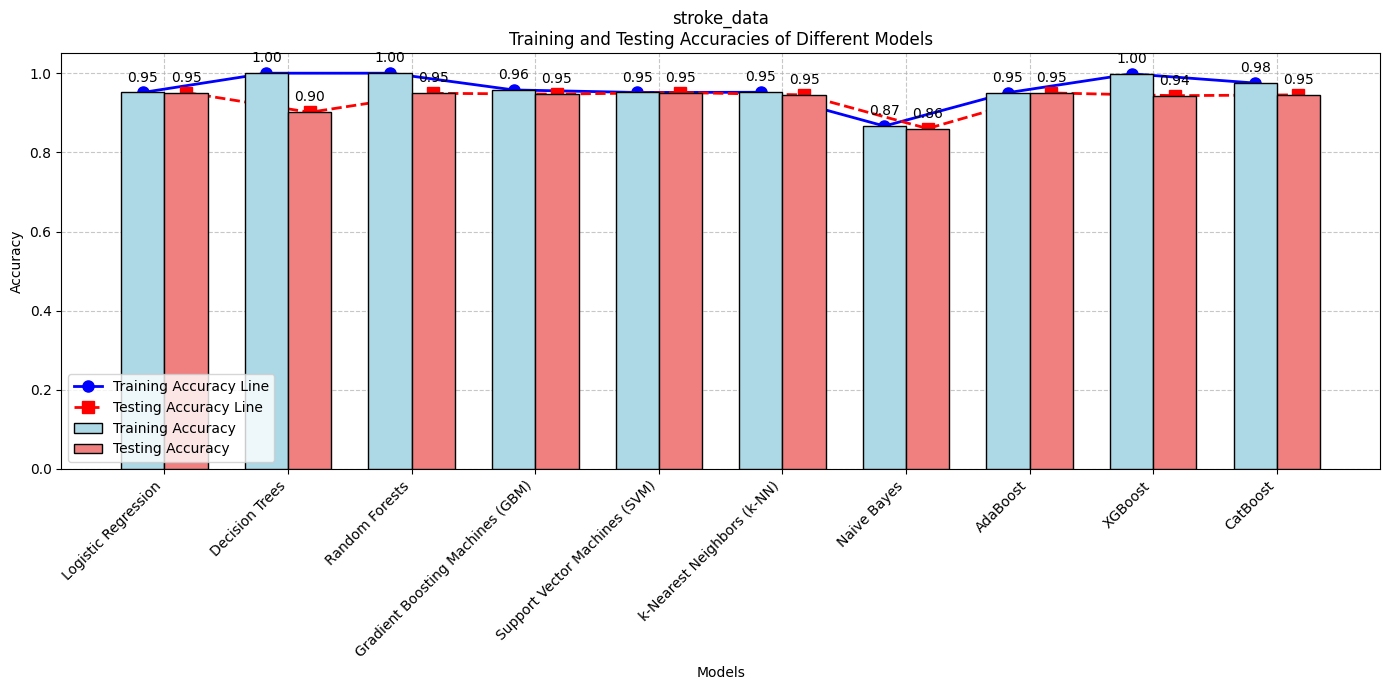

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names, training accuracies, and testing accuracies
model_names = list(results.keys())
train_accuracies = [results[name]['Training Accuracy'] for name in model_names]
test_accuracies = [results[name]['Testing Accuracy'] for name in model_names]

# Set up the positions and bar width
x = np.arange(len(model_names))
bar_width = 0.35  # Width of the bars

# Create a figure and a set of subplots
plt.figure(figsize=(14, 7))

# Create a grouped bar plot
plt.bar(x - bar_width/2, train_accuracies, bar_width, color='lightblue', label='Training Accuracy', edgecolor='black', zorder=3)
plt.bar(x + bar_width/2, test_accuracies, bar_width, color='lightcoral', label='Testing Accuracy', edgecolor='black', zorder=3)

# Add accuracy scores on top of the bars
for i in range(len(model_names)):
    plt.text(x[i] - bar_width/2, train_accuracies[i] + 0.02, f'{train_accuracies[i]:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    plt.text(x[i] + bar_width/2, test_accuracies[i] + 0.02, f'{test_accuracies[i]:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Add line plots to connect accuracy points
plt.plot(x - bar_width/2, train_accuracies, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Training Accuracy Line', zorder=2)
plt.plot(x + bar_width/2, test_accuracies, marker='s', color='red', linestyle='--', linewidth=2, markersize=8, label='Testing Accuracy Line', zorder=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('stroke_data\nTraining and Testing Accuracies of Different Models')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()



In [ ]:

# Prepare the input data for prediction
input_data = [1, 75, 0, 1, 1, 2, 1, 228.69, 36.6, 3]
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)  # Convert to NumPy array and reshape for prediction

# Make a prediction using the trained model
prediction = best_model.predict(input_data_as_numpy_array)
probabilities = best_model.predict_proba(input_data_as_numpy_array)  # Get probabilities
probability = probabilities[0][1]  # Probability of having asthma

# Determine the result based on the prediction and probability
if prediction[0] == 0:
    result_message = "Based on the analysis, it appears that you are not at high risk for a stroke."
else:
    result_message = "Based on the analysis, it appears that you are at a higher risk for a stroke."

# Print the result and the probability
print(result_message)
print(f"The estimated probability of having a stroke is {probability:.2f}.")

# Provide clear, user-friendly recommendations based on the probability
if probability < 0.3:
    recommendation = (
        "It looks like you are at a low risk for having a stroke at this time. Continue to maintain a healthy lifestyle, including regular exercise and a balanced diet, and schedule routine check-ups with your healthcare provider."
    )
elif 0.3 <= probability < 0.7:
    recommendation = (
        "There is a moderate risk of having a stroke. We recommend that you consult with a healthcare professional for a more detailed assessment and to discuss ways to reduce your risk."
    )
else:
    recommendation = (
        "The analysis indicates a high risk of stroke. It is crucial that you seek immediate medical attention for a comprehensive evaluation and to explore preventative measures."
    )

print(recommendation)
print('\n\n\n')



Based on the analysis, it appears that you are not at high risk for a stroke.
The estimated probability of having a stroke is 0.27.
It looks like you are at a low risk for having a stroke at this time. Continue to maintain a healthy lifestyle, including regular exercise and a balanced diet, and schedule routine check-ups with your healthcare provider.






/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


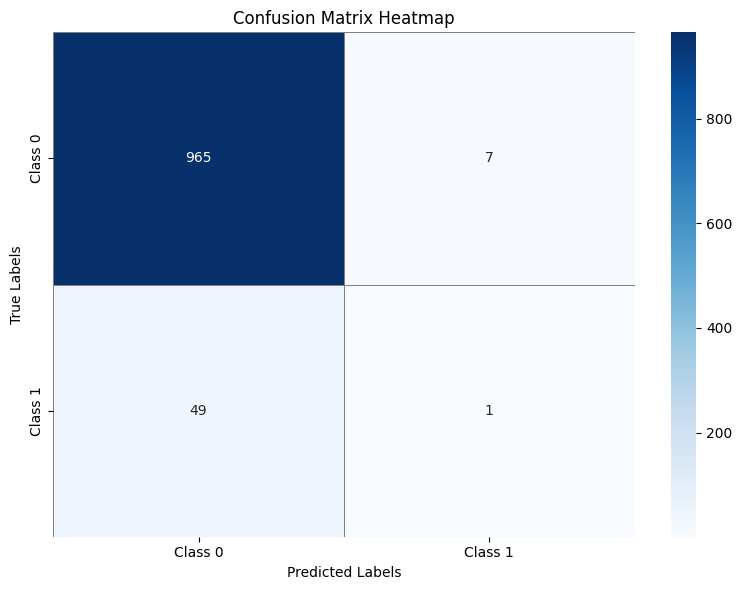

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_test_pred are defined
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='gray',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Add title and labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming X_train is a DataFrame
feature_names = X_train.columns
print(f"Feature names: {list(feature_names)}")

Feature names: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [ ]:
#import pickle

In [ ]:
#filename = 'stroke_disease_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
#loaded_model = pickle.load(open('stroke_disease_model.sav', 'rb'))

In [ ]:
#for column in X.columns:
  #print(column)